# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [4]:
import pandas as pd

In [5]:
killings = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/dataset/police-killings.csv')
killings.shape

(467, 15)

#### A) Starter question: Display a few lines of the dataset to the screen.

In [6]:
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669



#### 1. Make the following changed to column names:

+ lawenforcementagency -> agency
+ raceethnicity        -> race


In [7]:
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

In [8]:
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669



#### 2. Show the count of missing values in each column


In [9]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

#### 3. replace each null value in the dataframe with the string "Unknown"

In [10]:
killings.streetaddress.fillna('Unknown', inplace=True)

In [11]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

#### 4. How many killings were there so far in 2015?

In [12]:
killings.year.value_counts()

2015    467
Name: year, dtype: int64

#### 5. Of all killings, how many were male and how many female?

In [13]:
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

#### 6. How many killings were of unarmed people?


In [14]:
unarmed_mask = killings[killings['armed'] == 'No']
unarmed_mask.armed.value_counts()

No    102
Name: armed, dtype: int64

#### 7. What percentage of all killings were unarmed?


In [15]:
round(((unarmed_mask.armed.count()*1.0) / killings.armed.count()) * 100, 2)

21.84

#### 8. What are the 5 states with the most killings?


In [16]:
killings[['state', 'Unnamed: 0']].groupby(['state']).count().reset_index().sort_values('Unnamed: 0', ascending=False).head(5)

,state,Unnamed: 0
4,CA,74
40,TX,46
9,FL,29
3,AZ,25
35,OK,22


#### 9. Show a value counts of deaths for each race


In [17]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

#### 10. Display a histogram of ages of all killings


In [18]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

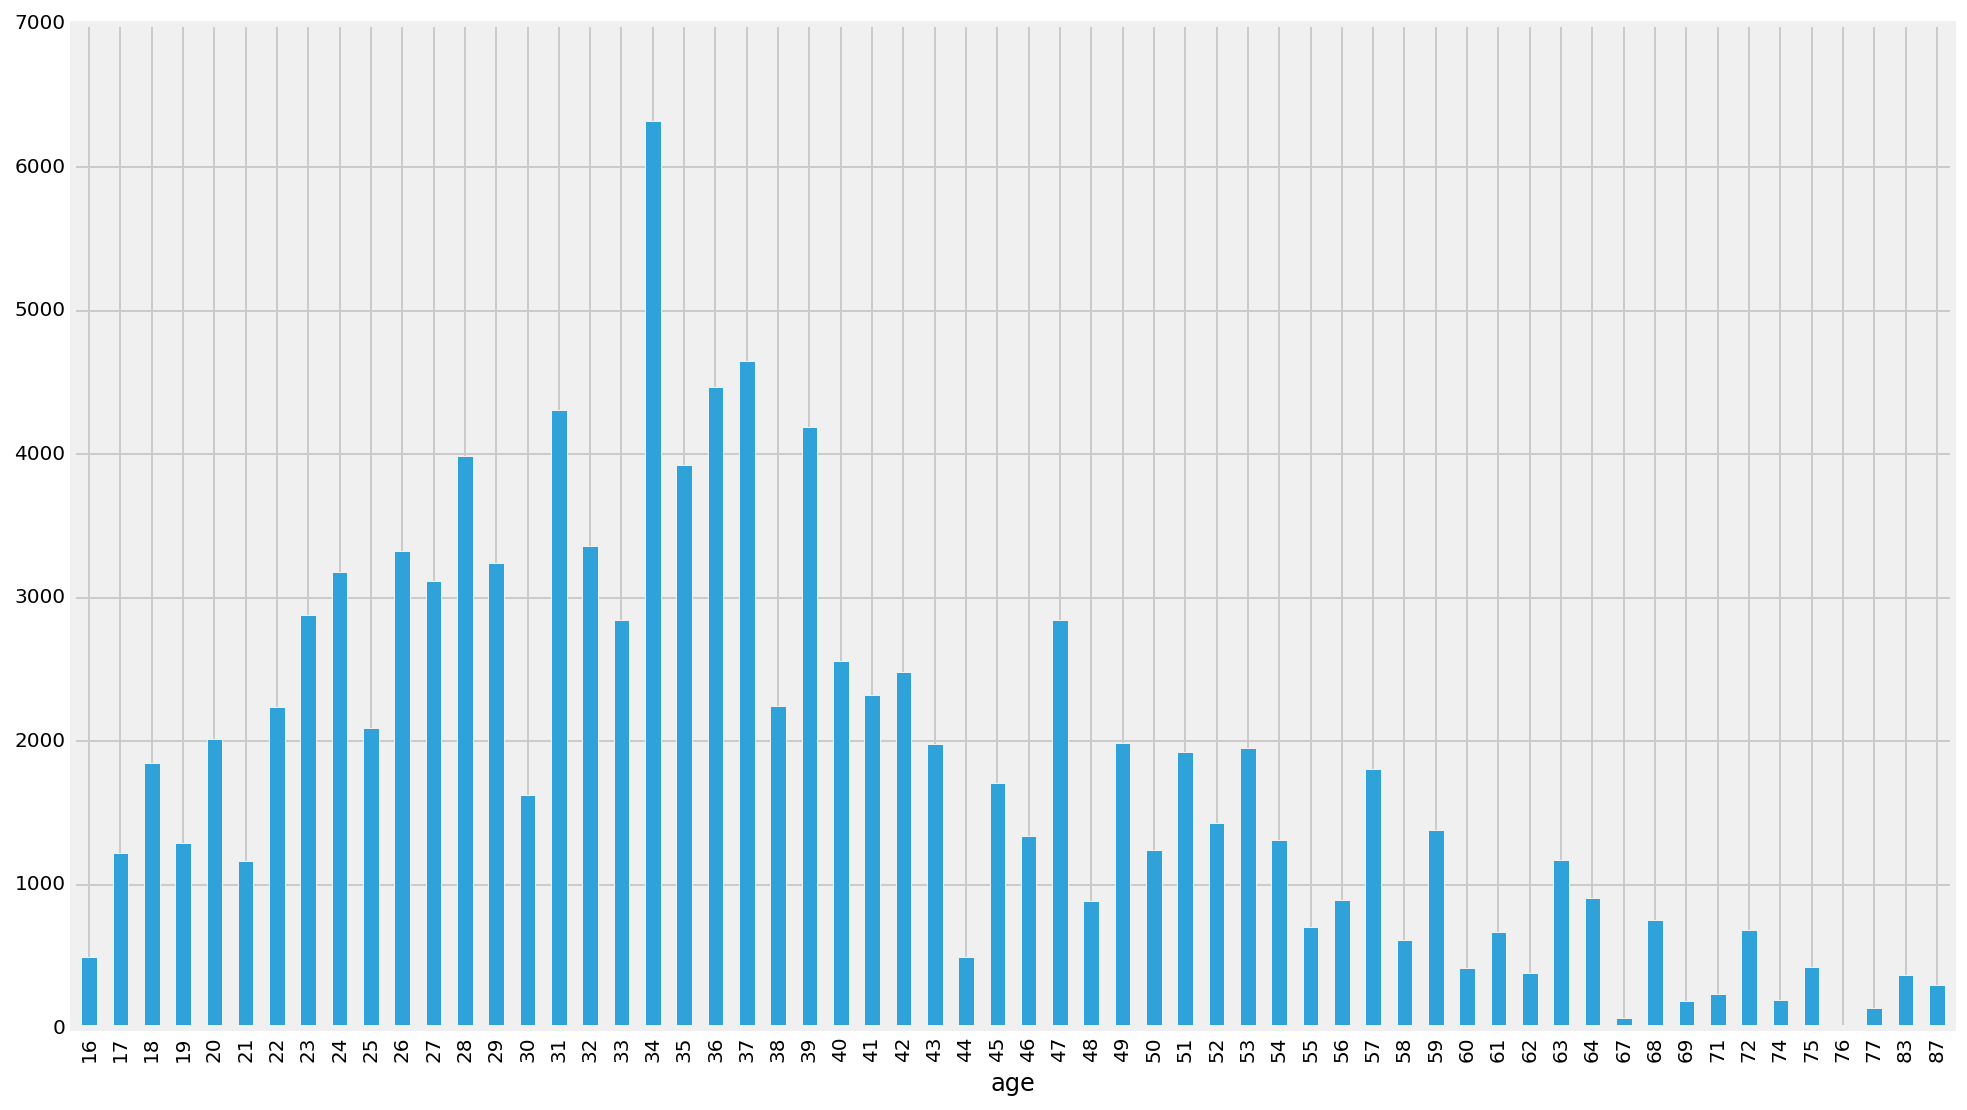

In [19]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()

killings[['age', 'Unnamed: 0']].groupby(['age']).sum().reset_index().plot(kind='bar', x='age', ax=ax)
ax.legend_.remove()

#### 11. Show 6 histograms of ages by race


In [20]:
killings.race.unique()

array(['Black', 'White', 'Hispanic/Latino', 'Unknown',
       'Asian/Pacific Islander', 'Native American'], dtype=object)

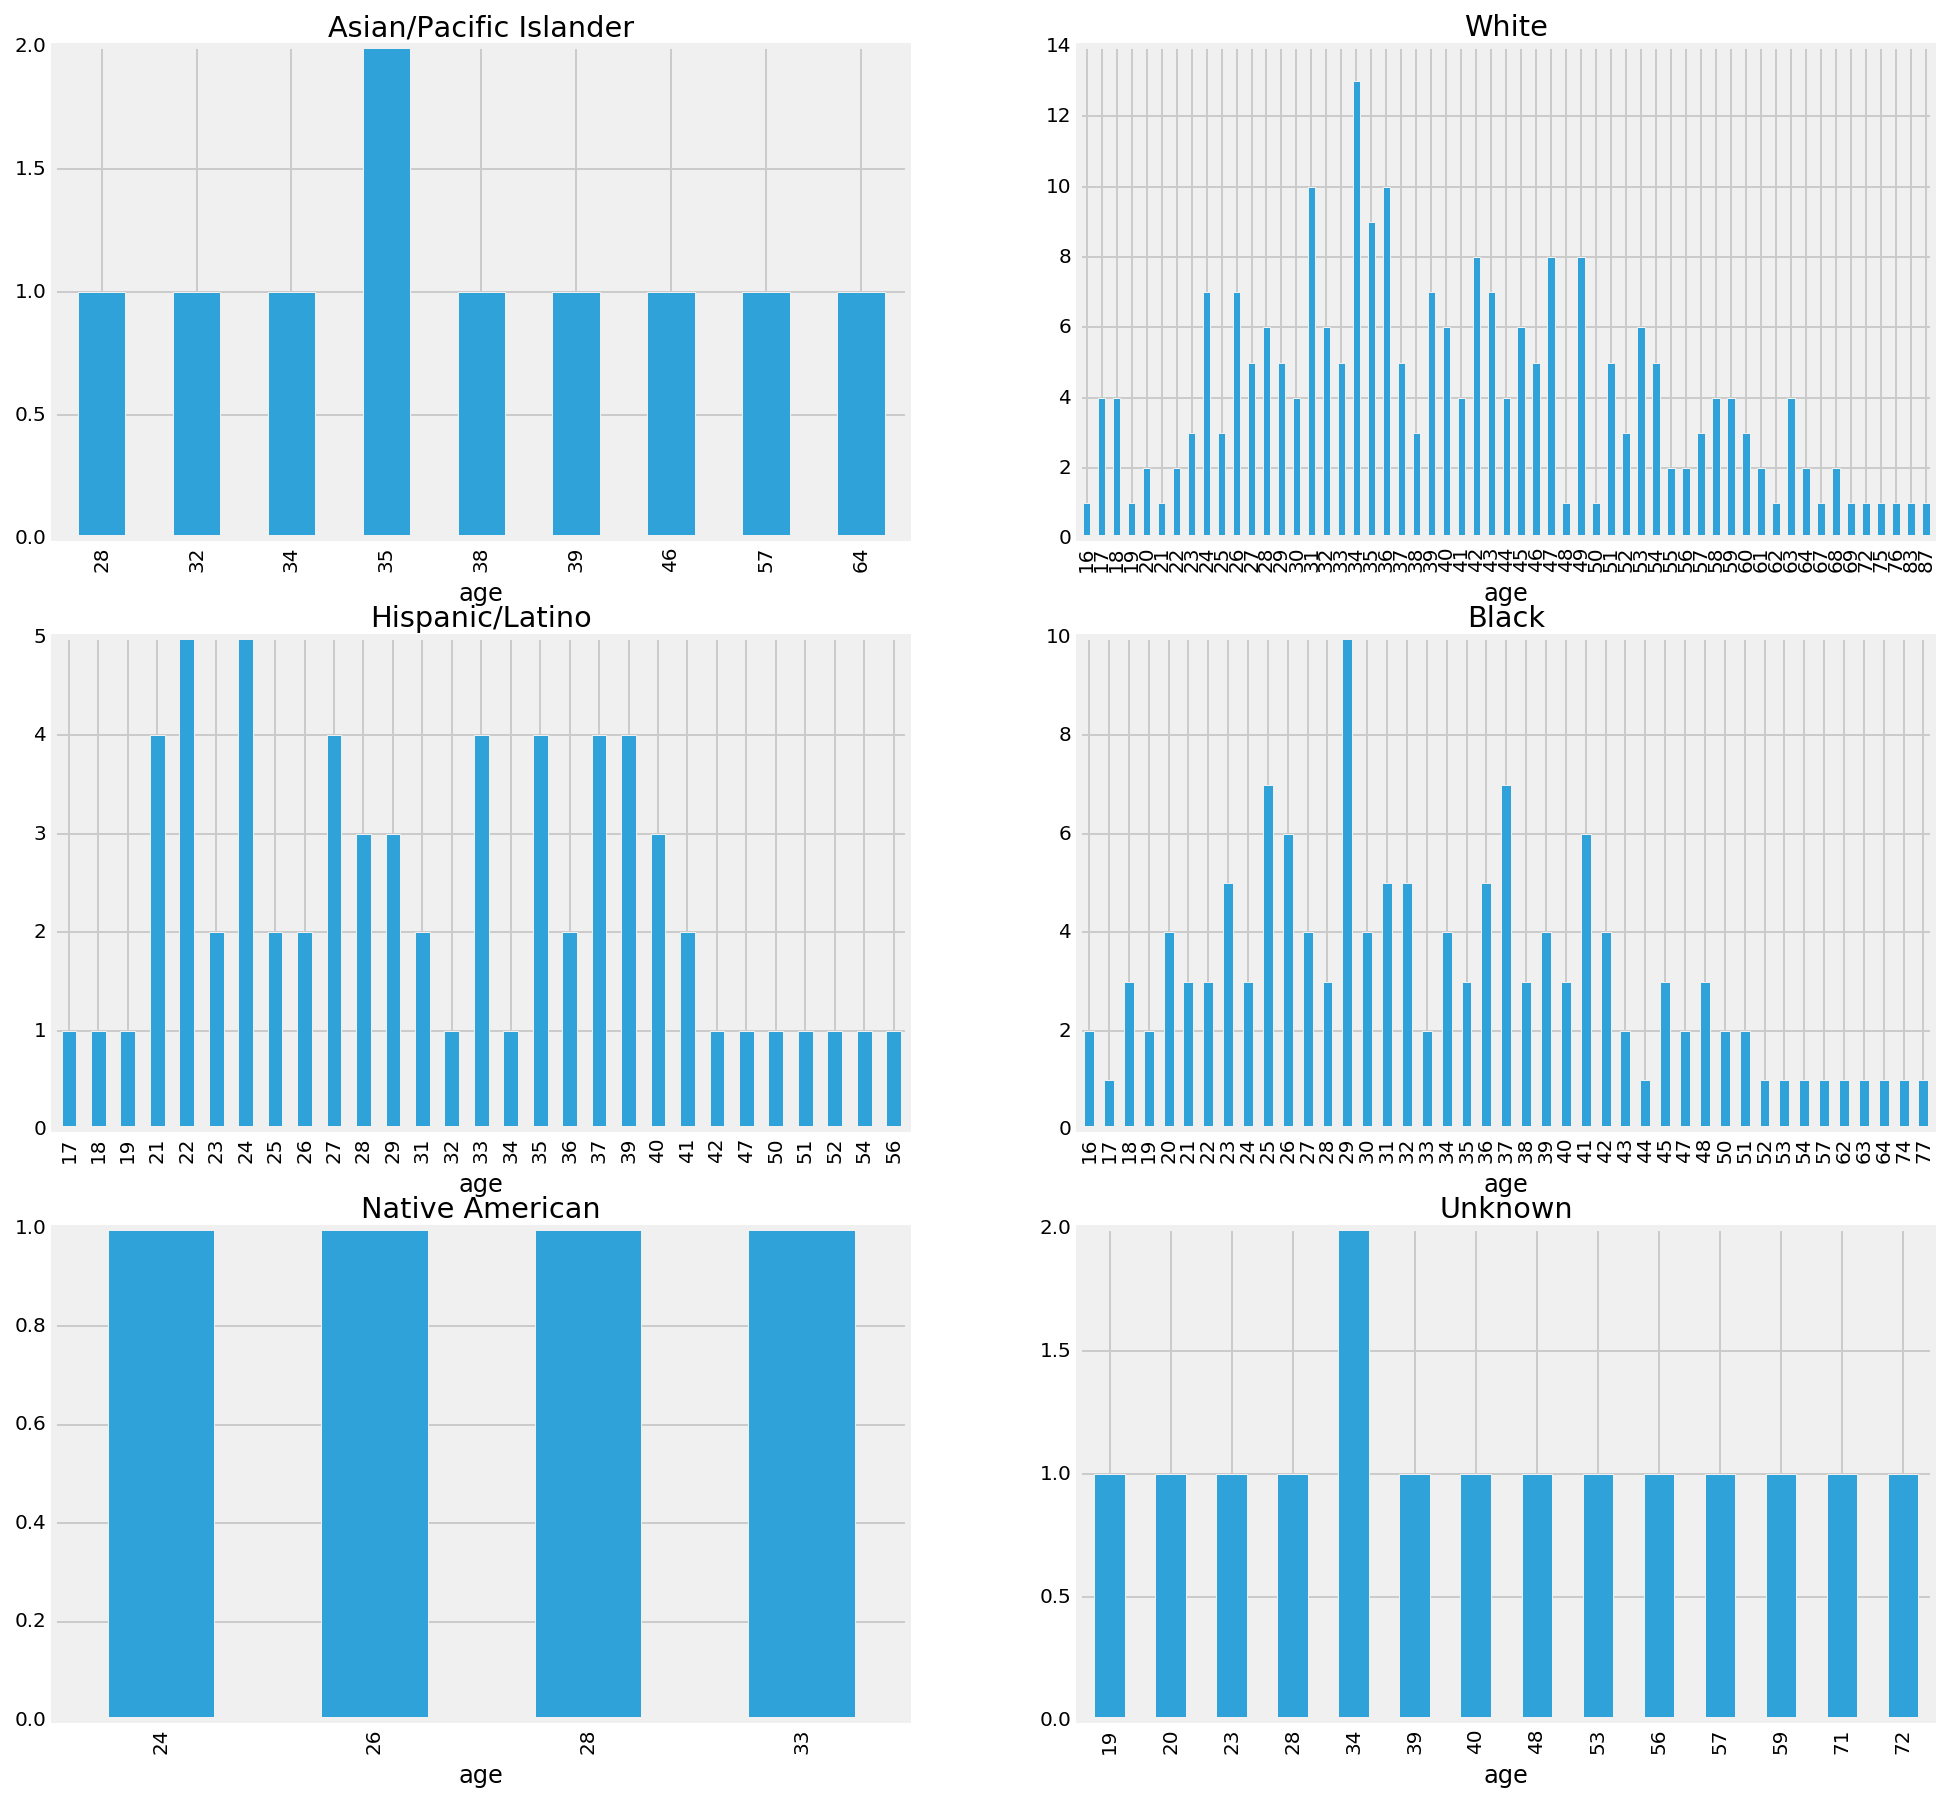

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,15))


killings[killings.race == 'Asian/Pacific Islander'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax1)
killings[killings.race == 'White'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax2)
killings[killings.race == 'Hispanic/Latino'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax3)
killings[killings.race == 'Black'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax4)
killings[killings.race == 'Native American'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax5)
killings[killings.race == 'Unknown'].groupby(['race', 'age'])[['Unnamed: 0']].count().reset_index().plot(kind='bar', x='age', ax=ax6)

ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()
ax6.legend_.remove()

ax1.set_title('Asian/Pacific Islander')
ax2.set_title('White')
ax3.set_title('Hispanic/Latino')
ax4.set_title('Black')
ax5.set_title('Native American')
ax6.set_title('Unknown')

#### 12. What is the average age of death by race?


In [22]:
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [23]:
print killings[killings.race == 'Asian/Pacific Islander'].groupby(['race'])['age'].mean()
print killings[killings.race == 'White'].groupby(['race'])['age'].mean()
print killings[killings.race == 'Hispanic/Latino'].groupby(['race'])['age'].mean()
print killings[killings.race == 'Black'].groupby(['race'])['age'].mean()
print killings[killings.race == 'Native American'].groupby(['race'])['age'].mean()
print killings[killings.race == 'Unknown'].groupby(['race'])['age'].mean()

race
Asian/Pacific Islander    40.8
Name: age, dtype: float64
race
White    40.466102
Name: age, dtype: float64
race
Hispanic/Latino    31.716418
Name: age, dtype: float64
race
Black    34.044444
Name: age, dtype: float64
race
Native American    27.75
Name: age, dtype: float64
race
Unknown    43.533333
Name: age, dtype: float64


#### 13. Show a bar chart with counts of deaths every month


In [28]:
killings.month.unique()

array(['February', 'April', 'March', 'January', 'May', 'June'], dtype=object)

In [33]:
killings_months['month'].apply(lambda x: str(x)+"-"+"2011").apply(lambda x: pd.to_datetime(str(x)))

2   2011-01-01
1   2011-02-01
4   2011-03-01
0   2011-04-01
5   2011-05-01
3   2011-06-01
Name: month, dtype: datetime64[ns]

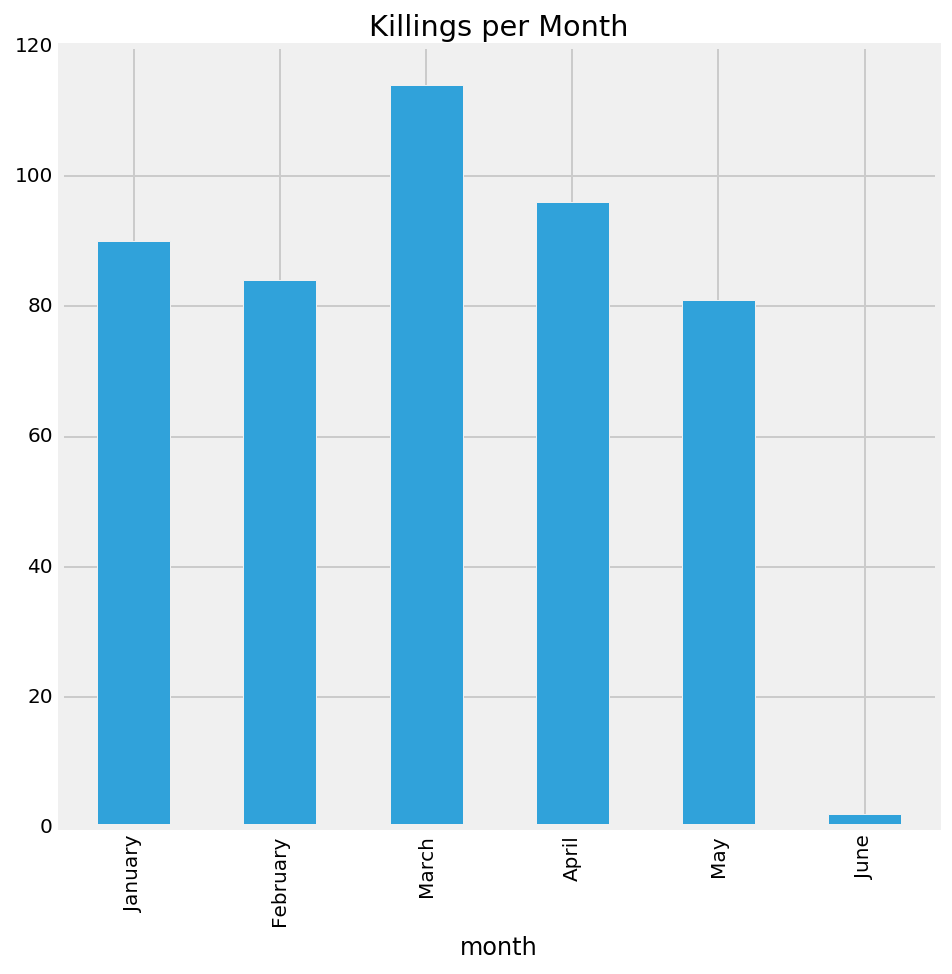

In [26]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

killings_months = killings.groupby(['month'])['Unnamed: 0'].count().reset_index().copy()
killings_months_test = killings.groupby(['month'])['Unnamed: 0'].count().reset_index().copy()

# Created a list for how I want sorted
order = ['January', 'February', 'March', 'April', 'May', 'June']
# Created a dictionary month:key
mapping = {month: i for i, month in enumerate(order)}
# Created a key by mapping the sorted months
key = killings_months.month.map(mapping)
# Since months are grouped, sorted the months with np.argsort(), which sorts based on a key/index, but since
# pre-created my own key, it will sort based on that key
killings_months = killings_months.iloc[key.argsort()]

killings_months.plot(kind='bar', x='month', ax=ax)
ax.legend_.remove()
ax.set_title('Killings per Month')

In [ ]:
mapping

In [ ]:
key

In [ ]:
killings_months